In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [391]:
df = pd.read_csv("alldata.csv")

In [392]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [393]:
mask = df.isnull().all(axis=1)
sum(mask)

11

In [248]:
newdf = df.dropna(axis=0, how='all')

In [249]:
print df.shape
print newdf.shape

In [250]:
newdf.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [251]:
# Simple grouping of the data
company = newdf.groupby('company')
company.size()

company
10x Genomics                          1
1199SEIU Family of Funds              1
1871                                  1
23andMe                              17
24 Hour Fitness                       1
2M Research Services                  1
2U                                    1
2rbConsulting                         2
3D Systems                            1
3Q Digital                            1
605                                   1
6sense                                1
7Cups                                 1
7Park Data                            3
84.51°                                3
A Place for Mom                       2
A+E Networks                          1
A-Line Staffing                       1
A2e Technologies                      1
AARP                                  1
AB Sciex Pte                          1
ACADIA Pharmaceuticals Inc.           1
ACLU                                  4
ACT Commodities                       1
ADMIN FOR CHILDREN'S SVCS       

In [252]:
newdf['reviews'] = newdf['reviews'].fillna(0)

In [253]:
newdf.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [254]:
test = newdf['location'][4004]
test = test.rstrip()
test

'New York, NY 10154'

In [255]:
test2 = newdf['location'][2009]
test2.rstrip()

'Washington, DC 20036'

In [256]:
re.sub('[\s+]+[\d]+[\d]+[\d]+[\d]+[\d]','',test2)

'Washington, DC'

In [257]:
newlocation = [row.rstrip() for row in newdf['location']]
newlocation = [re.sub('[\s*]+[\d]+[\d]+[\d]+[\d]+[\d]','',row) for row in newlocation]
newdf['newlocation'] = pd.Series(newlocation,index = newdf.index)

In [258]:
newdf['newlocation'].unique()

array(['Atlanta, GA', 'Austin, TX', 'Round Rock, TX', 'Cedar Park, TX',
       'Boulder, CO', 'Boston, MA', 'Chicago, IL', 'Washington, DC',
       'Los Angeles, CA', 'Cambridge, MA', 'Mountain View, CA',
       'Manhattan, NY', 'New York, NY', 'Jersey City, NJ', 'Newark, NJ',
       'Oakland, NJ', 'Bronx, NY', 'Hoboken, NJ', 'Brooklyn, NY',
       'Rutherford, NJ', 'Union, NJ', 'Rahway, NJ', 'Murray Hill, NJ',
       'South Plainfield, NJ', 'Queens, NY', 'Little Falls, NJ',
       'Florham Park, NJ', 'Troy Hills, NJ', 'Bloomfield, NJ',
       'Lynbrook, NY', 'Allendale, NJ', 'Parsippany, NJ',
       'West Orange, NJ', 'Kenilworth, NJ', 'Ridgefield, NJ',
       'Harrison, NY', 'Montclair, NJ', 'Fort Lee, NJ', 'Carlstadt, NJ',
       'Orangeburg, NY', 'Fairfield, NJ', 'Palisades, NY',
       'Hackensack, NJ', 'Roseland, NJ', 'East Hanover, NJ',
       'Long Beach, NY', 'Whippany, NJ', 'Manhasset, NY', 'Yonkers, NY',
       'New Hyde Park, NY', 'Secaucus, NJ', 'Port Washington, NY',
    

In [259]:
area = newdf.groupby('newlocation')
areacount = area.size().to_frame()
locationcount = areacount.sort_values(0,ascending = False)
company = newdf.groupby('company')
companycount = company.size().to_frame()
companycount = companycount.sort_values(0,ascending = False)

In [163]:
companycount

,0
company,
Amazon.com,358
Ball Aerospace,187
Microsoft,137
Google,134
NYU Langone Health,77
Fred Hutchinson Cancer Research Center,70
KPMG,66
Lab126,50
Facebook,49


In [169]:
plt.figure(figsize=(12,6))
locationcount.plot.bar

<bound method FramePlotMethods.bar of <pandas.plotting._core.FramePlotMethods object at 0x10a456d50>>

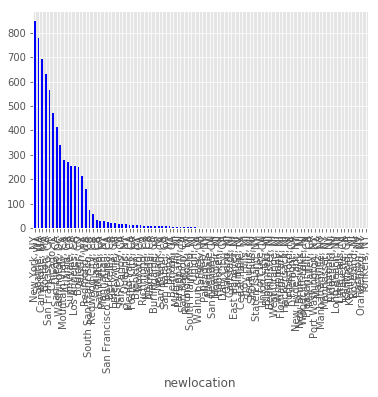

In [176]:
newdf.groupby('newlocation')['location'].count().sort_values(ascending = False).plot.bar(color = 'b')

In [177]:
newdf['description'][0]

"Development Director\nALS Therapy Development Institute has an immediate opening for Development Directors. Reporting directly to the Senior Development Director, the Development Director at ALS TDI is a senior fundraising position working to identifying potential prospects and cultivating solicitation strategies and in closing asks with donors including individuals and corporations by building networks via events, generating awareness of ALS TDI; outreach including attending and speaking at events as well as personally cultivates relationships with patients, prospects and donors. This position will be responsible for generating and managing a portfolio of at least two million to five million dollars per year. This position will be located in Atlanta, GA.\n\nRequirements:\nBachelor's Degree requiredMinimum 6-8 years' experience in fundraising and business developmentSuccessful track recording in fundraising with major donors or scientific sales preferredDemonstrated ability to work in

In [178]:
newdf.head()

,position,company,description,reviews,location,newlocation
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301","Atlanta, GA"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA","Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA"


In [180]:
newdf.to_excel('cleandata.xlsx',sheet_name = 'sheet1')

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 24: ordinal not in range(128)

In [181]:
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [198]:
newdf.to_excel('cleandata.xlsx',sheet_name = 'sheet1')

In [184]:
test2 = newdf['newlocation'][0]

In [189]:
re.split(',',test2)[0]

'Atlanta'

In [260]:
city = [re.split(',',row)[0] for row in newdf['newlocation']]

In [261]:
state = [re.split(',',row)[1] for row in newdf['newlocation']]

In [262]:
state = map(lambda x: x.strip(),state)

In [263]:
newdf['city'] = pd.Series(city,index = newdf.index)
newdf['state'] = pd.Series(state,index = newdf.index)

In [264]:
newdf.head()

,position,company,description,reviews,location,newlocation,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301","Atlanta, GA",Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA","Atlanta, GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA","Atlanta, GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA",Atlanta,GA


In [265]:
a = newdf['description'][3].lower()
python = [row.lower().count('python') for row in newdf['description']]
sum(python)

3717

In [127]:
def countkeywords(keyword):
    num = [str(row).lower().count(keyword) for row in newalldata['description']]
    return keyword,sum(num)

In [128]:
countkeywords('machine learning')

('machine learning', 7171)

In [268]:
from collections import Counter
test = newdf['description'][3]
test2 = re.findall('[\w]+',test)
Counter(test2).most_common()

[('and', 27),
 ('data', 18),
 ('in', 12),
 ('the', 10),
 ('of', 9),
 ('for', 8),
 ('to', 6),
 ('or', 4),
 ('2', 4),
 ('database', 4),
 ('impact', 3),
 ('operational', 3),
 ('performance', 3),
 ('financial', 3),
 ('relational', 3),
 ('status', 3),
 ('modeling', 3),
 ('SQL', 3),
 ('more', 3),
 ('on', 3),
 ('databases', 3),
 ('analyst', 3),
 ('as', 3),
 ('a', 3),
 ('GA', 2),
 ('years', 2),
 ('through', 2),
 ('statistical', 2),
 ('based', 2),
 ('languages', 2),
 ('Atlanta', 2),
 ('analytical', 2),
 ('methods', 2),
 ('related', 2),
 ('00', 2),
 ('protected', 2),
 ('making', 2),
 ('AND', 2),
 ('s', 2),
 ('HOPE', 2),
 ('Program', 2),
 ('R', 2),
 ('STATA', 2),
 ('work', 2),
 ('will', 2),
 ('concepts', 2),
 ('is', 2),
 ('any', 2),
 ('information', 2),
 ('Python', 2),
 ('field', 2),
 ('that', 2),
 ('reporting', 2),
 ('000', 2),
 ('sets', 2),
 ('operations', 1),
 ('all', 1),
 ('Bachelor', 1),
 ('correlation', 1),
 ('SUMMARYThe', 1),
 ('scientist', 1),
 ('participate', 1),
 ('integrity', 1),
 ('fi

In [404]:
allstring = ""
for des in newdf['description']:
    allstring += des
allstring = allstring.lower()

In [405]:
alllist = re.findall('[\w]+',allstring)
len(alllist)
alllist[0]

'development'

In [427]:
wordcount = Counter(alllist).most_common()
wordcount[860]

('city', 671)

In [410]:
len(wordcount)

40305

In [415]:
len(set(wordcount))

40305

In [317]:
test = a[50:60]
test

[('machine', 7646),
 ('strong', 7618),
 ('product', 7557),
 ('your', 7433),
 ('related', 7267),
 ('knowledge', 7192),
 ('engineering', 7026),
 ('systems', 6867),
 ('degree', 6554),
 ('environment', 6499)]

In [331]:
test = [str(single) for single in test]   
test2 = list(re.findall('[a-z]+',single) for single in test)

In [305]:
description = newdf['description']

In [308]:
description = list(description)

In [309]:
len(description)

6953

In [332]:
test2

[['machine'],
 ['strong'],
 ['product'],
 ['your'],
 ['related'],
 ['knowledge'],
 ['engineering'],
 ['systems'],
 ['degree'],
 ['environment']]

In [334]:
import itertools
test3 = list(itertools.chain(*test2))

In [335]:
test3

['machine',
 'strong',
 'product',
 'your',
 'related',
 'knowledge',
 'engineering',
 'systems',
 'degree',
 'environment']

In [416]:
allwords = [str(single) for single in a]   
allwords = list(re.findall('[a-z]+',single) for single in allwords)
allwords[0:10]

[['and'],
 ['to'],
 ['the'],
 ['of'],
 ['in'],
 ['a'],
 ['with'],
 ['data'],
 ['for'],
 ['or']]

In [387]:
finalwords = list(itertools.chain(*allwords))
len(finalwords)

39655

In [413]:
newlist = set(finalwords)
len(newlist)

37563

In [417]:
wordstest = pd.DataFrame(columns = newlist, index = range(0,len(description)))

In [418]:
wordstest.head()
#wordstest.shape

,nordisk,circuitry,netcdf,gavan,layoutexperience,localized,reallocations,canes,aileen,originality,...,upholds,inclusiongeorgia,repertoire,nonsensitive,bostonare,agios,aklusion,glycobiology,departmentalm,expands
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [356]:
b = finalwords[0]

In [358]:
[i in description[0] for i in finalwords]
        

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,


In [375]:
for i in finalwords:
    if i in description[0]:
        wordstest.set_value(0,i,1)
    else:
        wordstest.set_value(0,i,0)

AttributeError: 'BlockManager' object has no attribute 'T'

In [381]:
wordstest.set_value(0,'and',1)

AttributeError: 'BlockManager' object has no attribute 'T'

In [384]:
wordstest['python']

,python,python,python,python,python,python
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


40305

In [2]:
newalldata = pd.read_csv("alldata2.csv")
newalldata = newalldata.dropna(axis=0, how = 'all')
sum(newalldata.isnull().all(axis=1))

0

In [3]:
allstring = ""
type(newalldata['description'][0])

str

In [4]:
for single in newalldata['description']:
    single = str(single)
    allstring += single

In [5]:
allstring = allstring.lower()

In [6]:
from collections import Counter

In [7]:
alltemp = re.findall('[\w]+',allstring)
wordcount = Counter(alltemp).most_common()

In [8]:
wordcount[1000]

('established', 539)

In [9]:
str(wordcount[0])
'and' in str(wordcount[0])

True

In [10]:
wordcount[0:836]

[('and', 218956),
 ('to', 110269),
 ('the', 100478),
 ('of', 91304),
 ('in', 70340),
 ('a', 63543),
 ('with', 53497),
 ('data', 41204),
 ('for', 40995),
 ('or', 37822),
 ('experience', 32255),
 ('is', 28032),
 ('as', 23319),
 ('you', 22420),
 ('our', 22239),
 ('we', 21706),
 ('on', 21280),
 ('will', 19434),
 ('work', 19304),
 ('s', 17173),
 ('team', 16728),
 ('be', 16669),
 ('are', 16557),
 ('an', 16054),
 ('that', 15670),
 ('research', 14682),
 ('skills', 12919),
 ('development', 12471),
 ('business', 12032),
 ('at', 12004),
 ('ability', 10281),
 ('this', 10223),
 ('other', 10145),
 ('learning', 9946),
 ('from', 9437),
 ('science', 9356),
 ('by', 9260),
 ('have', 9126),
 ('new', 9116),
 ('analysis', 9074),
 ('years', 9002),
 ('including', 8388),
 ('technical', 8306),
 ('all', 8287),
 ('management', 8197),
 ('design', 7997),
 ('working', 7956),
 ('required', 7660),
 ('machine', 7609),
 ('software', 7559),
 ('strong', 7544),
 ('support', 7543),
 ('product', 7478),
 ('your', 7368),
 ('re

In [11]:
newalldata.shape

(6887, 5)

In [12]:
len(set(wordcount))

40098

In [13]:
phraselen = 2
vector3 = []
for i in range(0,len(alltemp)-(phraselen-1)):
    temp_phrase = alltemp[i] + ' ' + alltemp[i+1]
    vector3 += [temp_phrase]
phrase_freq = Counter(vector3)
phrase_freq_vector = list(phrase_freq.most_common())


In [14]:
phrase_freq_vector[1000:1200]

[('of statistical', 342),
 ('professional experience', 341),
 ('to get', 341),
 ('proven track', 341),
 ('sense of', 341),
 ('more of', 340),
 ('are required', 340),
 ('plan and', 340),
 ('and regulatory', 339),
 ('health care', 339),
 ('in at', 339),
 ('place to', 339),
 ('join a', 338),
 ('works with', 338),
 ('out of', 338),
 ('across multiple', 337),
 ('for new', 337),
 ('year of', 337),
 ('is proud', 337),
 ('predictive models', 336),
 ('communicate with', 336),
 ('start up', 335),
 ('services to', 335),
 ('programming skills', 335),
 ('or the', 335),
 ('and scientists', 335),
 ('partners and', 335),
 ('race religion', 334),
 ('and quality', 333),
 ('of more', 333),
 ('research in', 332),
 ('strong communication', 332),
 ('with clients', 332),
 ('technology to', 332),
 ('microsoft office', 331),
 ('establish and', 331),
 ('ideas and', 331),
 ('and maintenance', 331),
 ('of professional', 331),
 ('bs degree', 330),
 ('origin disability', 330),
 ('s largest', 330),
 ('and high', 330

In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print stop_words

set([u'all', u'just', u"don't", u'being', u'over', u'both', u'through', u'yourselves', u'its', u'before', u'o', u'don', u'hadn', u'herself', u'll', u'had', u'should', u'to', u'only', u'won', u'under', u'ours', u'has', u"should've", u"haven't", u'do', u'them', u'his', u'very', u"you've", u'they', u'not', u'during', u'now', u'him', u'nor', u"wasn't", u'd', u'did', u'didn', u'this', u'she', u'each', u'further', u"won't", u'where', u"mustn't", u"isn't", u'few', u'because', u"you'd", u'doing', u'some', u'hasn', u"hasn't", u'are', u'our', u'ourselves', u'out', u'what', u'for', u"needn't", u'below', u're', u'does', u"shouldn't", u'above', u'between', u'mustn', u't', u'be', u'we', u'who', u"mightn't", u"doesn't", u'were', u'here', u'shouldn', u'hers', u"aren't", u'by', u'on', u'about', u'couldn', u'of', u"wouldn't", u'against', u's', u'isn', u'or', u'own', u'into', u'yourself', u'down', u"hadn't", u'mightn', u"couldn't", u'wasn', u'your', u"you're", u'from', u'her', u'their', u'aren', u"it's",

In [26]:
list(stop_words)

[u'all',
 u'just',
 u"don't",
 u'being',
 u'over',
 u'both',
 u'through',
 u'yourselves',
 u'its',
 u'before',
 u'o',
 u'don',
 u'hadn',
 u'herself',
 u'll',
 u'had',
 u'should',
 u'to',
 u'only',
 u'won',
 u'under',
 u'ours',
 u'has',
 u"should've",
 u"haven't",
 u'do',
 u'them',
 u'his',
 u'very',
 u"you've",
 u'they',
 u'not',
 u'during',
 u'now',
 u'him',
 u'nor',
 u"wasn't",
 u'd',
 u'did',
 u'didn',
 u'this',
 u'she',
 u'each',
 u'further',
 u"won't",
 u'where',
 u"mustn't",
 u"isn't",
 u'few',
 u'because',
 u"you'd",
 u'doing',
 u'some',
 u'hasn',
 u"hasn't",
 u'are',
 u'our',
 u'ourselves',
 u'out',
 u'what',
 u'for',
 u"needn't",
 u'below',
 u're',
 u'does',
 u"shouldn't",
 u'above',
 u'between',
 u'mustn',
 u't',
 u'be',
 u'we',
 u'who',
 u"mightn't",
 u"doesn't",
 u'were',
 u'here',
 u'shouldn',
 u'hers',
 u"aren't",
 u'by',
 u'on',
 u'about',
 u'couldn',
 u'of',
 u"wouldn't",
 u'against',
 u's',
 u'isn',
 u'or',
 u'own',
 u'into',
 u'yourself',
 u'down',
 u"hadn't",
 u'migh

In [486]:
len(set(alltemp))

40305

In [16]:
emptylist = []
for word in alltemp:
    if word not in list(stop_words):
        emptylist += [word]

In [17]:
len(emptylist)

2506694

In [18]:
len(alltemp)

3747964

In [19]:
Counter(emptylist).most_common()

[('data', 41204),
 ('experience', 32255),
 ('work', 19304),
 ('team', 16728),
 ('research', 14682),
 ('skills', 12919),
 ('development', 12471),
 ('business', 12032),
 ('ability', 10281),
 ('learning', 9946),
 ('science', 9356),
 ('new', 9116),
 ('analysis', 9074),
 ('years', 9002),
 ('including', 8388),
 ('technical', 8306),
 ('management', 8197),
 ('design', 7997),
 ('working', 7956),
 ('required', 7660),
 ('machine', 7609),
 ('software', 7559),
 ('strong', 7544),
 ('support', 7543),
 ('product', 7478),
 ('related', 7184),
 ('knowledge', 7052),
 ('engineering', 6937),
 ('systems', 6794),
 ('degree', 6498),
 ('environment', 6396),
 ('develop', 6269),
 ('solutions', 6185),
 ('opportunity', 6150),
 ('company', 6133),
 ('information', 6101),
 ('amp', 6077),
 ('teams', 6071),
 ('analytics', 5997),
 ('qualifications', 5918),
 ('requirements', 5694),
 ('position', 5612),
 ('technology', 5478),
 ('products', 5325),
 ('status', 5276),
 ('projects', 5242),
 ('world', 5193),
 ('clinical', 5156)

In [20]:
Counter(alltemp).most_common()

[('and', 218956),
 ('to', 110269),
 ('the', 100478),
 ('of', 91304),
 ('in', 70340),
 ('a', 63543),
 ('with', 53497),
 ('data', 41204),
 ('for', 40995),
 ('or', 37822),
 ('experience', 32255),
 ('is', 28032),
 ('as', 23319),
 ('you', 22420),
 ('our', 22239),
 ('we', 21706),
 ('on', 21280),
 ('will', 19434),
 ('work', 19304),
 ('s', 17173),
 ('team', 16728),
 ('be', 16669),
 ('are', 16557),
 ('an', 16054),
 ('that', 15670),
 ('research', 14682),
 ('skills', 12919),
 ('development', 12471),
 ('business', 12032),
 ('at', 12004),
 ('ability', 10281),
 ('this', 10223),
 ('other', 10145),
 ('learning', 9946),
 ('from', 9437),
 ('science', 9356),
 ('by', 9260),
 ('have', 9126),
 ('new', 9116),
 ('analysis', 9074),
 ('years', 9002),
 ('including', 8388),
 ('technical', 8306),
 ('all', 8287),
 ('management', 8197),
 ('design', 7997),
 ('working', 7956),
 ('required', 7660),
 ('machine', 7609),
 ('software', 7559),
 ('strong', 7544),
 ('support', 7543),
 ('product', 7478),
 ('your', 7368),
 ('re

In [21]:
wordcountlist = [str(word) for word in wordcount]

In [22]:
emptylist = ""
for word in newalldata['description'][0]:
    if word not in stop_words:
        emptylist += word

In [23]:
from nltk.tokenize import word_tokenize
words = word_tokenize(newalldata['description'][0])
filtered_string = []
for w in words:
    if w not in stop_words:
        filtered_string.append(w)

In [24]:
Counter(filtered_string).most_common()

[(',', 16),
 ('.', 14),
 ('ALS', 10),
 ('Development', 7),
 ('including', 4),
 ('ALS.net', 4),
 ('Director', 3),
 ('donors', 3),
 ('Institute', 3),
 ('fundraising', 3),
 ('Therapy', 3),
 ('TDI', 3),
 ('patients', 3),
 ('position', 3),
 ('(', 2),
 ('presentation', 2),
 ('skills', 2),
 ('research', 2),
 ('ability', 2),
 ('This', 2),
 ('million', 2),
 ('prospects', 2),
 ('Please', 2),
 ('management', 2),
 (':', 2),
 ('generating', 2),
 ('families', 2),
 ('information', 2),
 (')', 2),
 ('events', 2),
 ("'s", 2),
 ('well', 2),
 ('Apply', 1),
 ('Requirements', 1),
 ('years', 1),
 ('interpersonal', 1),
 ('portfolio', 1),
 ('networks', 1),
 ('relationships', 1),
 ('slow', 1),
 ('based', 1),
 ('system', 1),
 ('time.Excellent', 1),
 ('prospects/projects', 1),
 ('include', 1),
 ('awareness', 1),
 ('horrible', 1),
 ('stop', 1),
 ('five', 1),
 ('travelExcellent', 1),
 ('GA', 1),
 ('world', 1),
 ('Senior', 1),
 ('one', 1),
 ('%', 1),
 ('identifying', 1),
 ('Led', 1),
 ('individuals', 1),
 ('served',

In [25]:
all_words_in_list = re.findall('[\w+]',allstring)

In [26]:
len(allstring)

26071487

In [27]:
[re.sub('[\d]+','',single_des) for single_des in newalldata['description']}

SyntaxError: invalid syntax (<ipython-input-27-7e45d43921b0>, line 1)

In [28]:
re.sub('[\d]+','',newalldata['description'][0])

"Development Director\nALS Therapy Development Institute has an immediate opening for Development Directors. Reporting directly to the Senior Development Director, the Development Director at ALS TDI is a senior fundraising position working to identifying potential prospects and cultivating solicitation strategies and in closing asks with donors including individuals and corporations by building networks via events, generating awareness of ALS TDI; outreach including attending and speaking at events as well as personally cultivates relationships with patients, prospects and donors. This position will be responsible for generating and managing a portfolio of at least two million to five million dollars per year. This position will be located in Atlanta, GA.\n\nRequirements:\nBachelor's Degree requiredMinimum - years' experience in fundraising and business developmentSuccessful track recording in fundraising with major donors or scientific sales preferredDemonstrated ability to work inde

In [29]:
empty = []
for single in newalldata['description']:
    single = str(single).lower()
    empty.append([re.sub('[\d]+','',single)])
    

In [30]:
import itertools

In [31]:
newempty = []
for i in empty:
    newempty.append(word_tokenize(str(i)))
newempty = list(itertools.chain(*newempty))

In [32]:
filtered_str = []
for w in newempty:
    if w not in stop_words:
        filtered_str.append(w)

In [33]:
newfilter = [re.sub('[\W]+','',word) for word in filtered_str]

In [34]:
filterwords = [word.lower() for word in newfilter]

In [35]:
words_frequency = Counter(filterwords).most_common()

In [36]:
words_frequency[0:100]

[('', 487828),
 ('data', 37506),
 ('experience', 19261),
 ('work', 15912),
 ('team', 14611),
 ('research', 13456),
 ('development', 11320),
 ('business', 11236),
 ('learning', 9033),
 ('skills', 8929),
 ('new', 8889),
 ('science', 8732),
 ('including', 8353),
 ('years', 8316),
 ('analysis', 7764),
 ('technical', 7444),
 ('machine', 7239),
 ('management', 7159),
 ('software', 6995),
 ('product', 6912),
 ('working', 6880),
 ('support', 6653),
 ('design', 6622),
 ('related', 6479),
 ('engineering', 6438),
 ('ability', 6152),
 ('degree', 6100),
 ('amp', 6068),
 ('systems', 5632),
 ('information', 5426),
 ('opportunity', 5397),
 ('analytics', 5375),
 ('knowledge', 5281),
 ('solutions', 5239),
 ('teams', 5087),
 ('technology', 4989),
 ('status', 4973),
 ('us', 4860),
 ('using', 4812),
 ('scientists', 4784),
 ('company', 4783),
 ('clinical', 4763),
 ('position', 4592),
 ('project', 4586),
 ('communication', 4574),
 ('develop', 4491),
 ('products', 4469),
 ('s', 4456),
 ('andor', 4434),
 ('acr

In [37]:
countkeywords('python')

NameError: name 'countkeywords' is not defined

In [44]:
keywordslist = ['python','sql','java','scala','excel',
        'aws','hadoop','spark','linux','tableau','sas',
               'linux','sas','hive','oracle','perl',
               'mysql','matlab','html','tensorflow','spss','mongodb']

In [45]:
keywords = []
for word in keywordslist:
     keywords.append(countkeywords(str(word)))

In [46]:
keywords

[('python', 3699),
 ('sql', 3008),
 ('java', 1955),
 ('scala', 1899),
 ('excel', 5716),
 ('aws', 1693),
 ('hadoop', 1117),
 ('spark', 1302),
 ('linux', 624),
 ('tableau', 599),
 ('sas', 1301),
 ('linux', 624),
 ('sas', 1301),
 ('hive', 619),
 ('oracle', 256),
 ('perl', 494),
 ('mysql', 180),
 ('matlab', 601),
 ('html', 260),
 ('tensorflow', 440),
 ('spss', 224),
 ('mongodb', 119)]

In [47]:
countkeywords('R')

('R', 0)

In [48]:
def countkeywords(keyword):
    num = [str(row).lower().count(keyword) for row in newalldata['description']]
    return keyword,sum(num)

In [49]:
keywords.append(countkeywords('R'))

In [50]:
keywords.append(countkeywords('C++'))

In [51]:
keywords.append(countkeywords('BI'))

In [52]:
keywords

[('python', 3699),
 ('sql', 3008),
 ('java', 1955),
 ('scala', 1899),
 ('excel', 5716),
 ('aws', 1693),
 ('hadoop', 1117),
 ('spark', 1302),
 ('linux', 624),
 ('tableau', 599),
 ('sas', 1301),
 ('linux', 624),
 ('sas', 1301),
 ('hive', 619),
 ('oracle', 256),
 ('perl', 494),
 ('mysql', 180),
 ('matlab', 601),
 ('html', 260),
 ('tensorflow', 440),
 ('spss', 224),
 ('mongodb', 119),
 ('R', 0),
 ('C++', 0),
 ('BI', 0)]

In [53]:
countkeywords('microsoft')

('microsoft', 1577)

In [54]:
countkeywords('powerpoint')

('powerpoint', 515)

In [55]:
countkeywords('ppt')

('ppt', 19)

In [56]:
countkeywords('redshift')

('redshift', 239)

In [57]:
countkeywords('scikit')

('scikit', 231)

In [58]:
keyskills = ['machine learning','data analysis','data visualization',
            'modeling','statistical analysis','research','deep learning'
            'optimization','decision tree','logistic','random forest',
            'a/b testing','web scraping','neural network','interpersonal skills',
            'communication skills']

In [59]:
for i in keyskills:
    print countkeywords(i)

('machine learning', 7171)
('data analysis', 1935)
('data visualization', 703)
('modeling', 2920)
('statistical analysis', 709)
('research', 15998)
('deep learningoptimization', 0)
('decision tree', 158)
('logistic', 400)
('random forest', 130)
('a/b testing', 145)
('web scraping', 10)
('neural network', 374)
('interpersonal skills', 616)
('communication skills', 2880)


In [60]:
countkeywords('optimization')

('optimization', 1563)

In [61]:
countkeywords('decision tree')

('decision tree', 158)

In [62]:
countkeywords('logistic')

('logistic', 400)

In [63]:
countkeywords('random forest')

('random forest', 130)

In [64]:
countkeywords('a/b testing')

('a/b testing', 145)

In [176]:
countkeywords('web scraping')

('web scraping', 10)

In [177]:
countkeywords('neural network')

('neural network', 374)

In [178]:
countkeywords('interpersonal skills')

('interpersonal skills', 616)

In [179]:
countkeywords('communication skills')

('communication skills', 2880)

In [180]:
countkeywords('bachelor')

('bachelor', 2293)

In [181]:
countkeywords('computer science')

('computer science', 2991)

In [182]:
countkeywords('statistics')

('statistics', 3151)

In [185]:
countkeywords('degree')

('degree', 6679)

In [65]:
degree_vector = []
for string in newalldata['description']:
    string = str(string)
    if 'degree' in string:
        index = string.index('degree')
        if index < 100:
            degree_vector.append(string[0:index+100])
        else:
            degree_vector.append(string[index-100:index+100])
    else:
        degree_vector.append('No degree requirement')

In [66]:
Counter(degree_vector).most_common()

[('No degree requirement', 3303),
 ("ignment Level I (only physical, biological and environmental sciences and public health) A master's degree from an accredited college or university with a specialization in an appropriate field of phy",
  36),
 ("fications:\nA minimum of three years of professional experience working as a Data Scientist\nMaster's degree or PhD from an accredited college/university in Computer Science, Statistics, Mathematics, En",
  13),
 ('or large scale distributed systems for commercial online services\nPreferred Qualifications\nAdvanced degree (MS, PhD)\nStrong sense of ownership, customer obsession, and drive\nExperience developing mach',
  12),
 (" the minimum requirements for an aspirant to be considered for the position applying to: Bachelor's degree in data science, applied mathematics, economics, statistics, engineering, industrial engineer",
  10),
 (' and exhibit the skills and competencies of the grade level should be considered. Each higher-level degre

In [202]:
['degree' in string for string in newalldata['description'][0:10]]

[False, True, True, False, False, True, True, False, True, False]

In [205]:
newalldata['description'][5].index('degree')

28

In [208]:
newalldata['description'][5][28:128]

'degree in Computer Science, Information Systems or closely related field\n10+ years of experience in '

In [67]:
def countlowerkeywords(keyword):
    num = [str(row).lower().count(keyword) for row in degree_vector]
    return keyword,sum(num)

In [68]:
def countupperkeywords(keyword):
    num = [str(row).count(keyword) for row in degree_vector]
    return keyword,sum(num)

In [69]:
degreelist = ['master',"master's",'phd','ph.d','bachelor',"bachelor's",
             'high school']

In [70]:
for i in degreelist:
    print countlowerkeywords(i)

('master', 907)
("master's", 268)
('phd', 459)
('ph.d', 201)
('bachelor', 1452)
("bachelor's", 499)
('high school', 21)


In [145]:
majorlist = ['computer science','data science','statistics','quantitative',
            'mathematics','economics','liberal arts','science','buisness',
            'engineer','engineering','psychology','biology','medicine',
            'marketing','business analysis','chemical engineering','chemistry',
            'public health','public relationship','years','experience']

In [148]:
keywords = []
word_count = []
for i in majorlist:
    keywords.append(countlowerkeywords(i)[0])
    word_count.append(countlowerkeywords(i)[1])

In [158]:
majors = pd.DataFrame(keywords,word_count,index=len(keywords))

TypeError: __init__() got multiple values for keyword argument 'index'

In [154]:
majors

,0
1121,computer science
136,data science
752,statistics
421,quantitative
494,mathematics
282,economics
0,liberal arts
1767,science
0,buisness
1070,engineer


In [238]:
countupperkeywords('BA')

('BA', 271)

In [239]:
countupperkeywords('BS')

('BS', 464)

In [240]:
countupperkeywords('MA')

('MA', 36)

In [241]:
countupperkeywords('MS')

('MS', 310)

In [242]:
countupperkeywords('Ph.D')

('Ph.D', 200)

In [243]:
countupperkeywords('PhD')

('PhD', 453)

In [246]:
countlowerkeywords('experience')

('experience', 2484)

In [247]:
d = {'col1':[1,2],'col2':[3,4]}
pd.DataFrame(data = d)

,col1,col2
0,1,3
1,2,4


In [73]:
words_frequency[1:100]

[('data', 37506),
 ('experience', 19261),
 ('work', 15912),
 ('team', 14611),
 ('research', 13456),
 ('development', 11320),
 ('business', 11236),
 ('learning', 9033),
 ('skills', 8929),
 ('new', 8889),
 ('science', 8732),
 ('including', 8353),
 ('years', 8316),
 ('analysis', 7764),
 ('technical', 7444),
 ('machine', 7239),
 ('management', 7159),
 ('software', 6995),
 ('product', 6912),
 ('working', 6880),
 ('support', 6653),
 ('design', 6622),
 ('related', 6479),
 ('engineering', 6438),
 ('ability', 6152),
 ('degree', 6100),
 ('amp', 6068),
 ('systems', 5632),
 ('information', 5426),
 ('opportunity', 5397),
 ('analytics', 5375),
 ('knowledge', 5281),
 ('solutions', 5239),
 ('teams', 5087),
 ('technology', 4989),
 ('status', 4973),
 ('us', 4860),
 ('using', 4812),
 ('scientists', 4784),
 ('company', 4783),
 ('clinical', 4763),
 ('position', 4592),
 ('project', 4586),
 ('communication', 4574),
 ('develop', 4491),
 ('products', 4469),
 ('s', 4456),
 ('andor', 4434),
 ('across', 4423),
 (

In [272]:
words_frequency[800]

('reviews', 540)

In [75]:
test = [re.findall('[a-z]+',str(word)) for word in words_frequency]

In [113]:
import itertools
words= list(itertools.chain(*test))[1:10]

In [114]:
countlist = []
numberlist = []
def countwords():
    for word in words:
        for string in newalldata['description']:
            string = str(string)
            numberlist.append(string.count(word))
        countlist.append("{}:{}".format(str(word),numberlist))
    return countlist

In [115]:
finalwordslist = countwords()

In [120]:
finalwordslist[0]

'experience:[1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 2, 12, 1, 6, 3, 4, 4, 4, 3, 2, 4, 3, 1, 3, 2, 5, 4, 3, 4, 6, 3, 3, 4, 1, 1, 4, 1, 5, 3, 6, 1, 4, 9, 3, 1, 1, 6, 0, 2, 10, 1, 2, 0, 1, 6, 4, 2, 6, 4, 1, 4, 3, 1, 3, 2, 0, 1, 2, 1, 6, 3, 2, 6, 1, 4, 6, 12, 1, 2, 4, 3, 2, 2, 3, 2, 2, 10, 5, 1, 2, 3, 2, 5, 7, 3, 2, 2, 1, 2, 3, 6, 2, 2, 3, 2, 1, 4, 7, 1, 2, 4, 4, 6, 5, 2, 2, 2, 3, 6, 3, 2, 1, 3, 4, 2, 3, 4, 4, 4, 4, 2, 2, 3, 1, 6, 4, 6, 1, 4, 3, 1, 2, 2, 3, 10, 1, 7, 3, 2, 0, 1, 4, 5, 4, 1, 2, 3, 4, 2, 3, 4, 1, 6, 4, 6, 4, 1, 4, 6, 5, 0, 2, 4, 7, 4, 3, 2, 3, 2, 4, 3, 3, 4, 1, 6, 2, 5, 3, 2, 2, 5, 6, 23, 2, 3, 1, 1, 5, 1, 3, 5, 0, 8, 4, 2, 0, 7, 5, 5, 7, 2, 3, 2, 4, 10, 7, 4, 5, 3, 2, 5, 2, 3, 4, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 4, 5, 2, 2, 0, 3, 7, 4, 2, 5, 5, 2, 1, 4, 2, 4, 8, 0, 0, 4, 2, 8, 1, 3, 1, 3, 1, 2, 2, 3, 1, 4, 5, 2, 2, 4, 4, 4, 0, 4, 3, 2, 7, 2, 1, 4, 0, 1, 2, 6, 3, 2, 5, 3, 4, 3, 5, 4, 3, 4, 4, 2, 4, 3, 0, 2, 0, 0, 2, 2, 3, 2, 2, 2, 2, 10, 1, 4, 3, 9, 2, 3, 2, 1, 0, 1, 5, 9, 1, 2, 5

In [81]:
from wordcloud import WordCloud
import nltk
import re
from textblob import TextBlob

#sample.generate('',join(newalldata['description'][0]))

In [83]:
sample = TextBlob(newalldata['description'][0]).ngrams(3)

In [94]:
string = allstring

In [98]:
len(allstring)

26071487

In [99]:
sample = WordCloud(background_color="white", max_words=2000)
sample.generate(allstring)

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

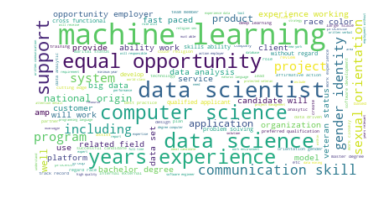

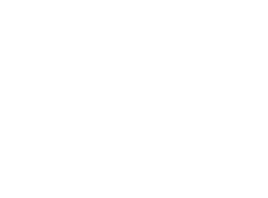

In [101]:
plt.imshow(sample, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

In [102]:
degree_vector

['No degree requirement',
 'rbally and in written form\n\nFluent in English\n\nStrong interpersonal skills\n\nMust demonstrate a high degree of integrity, trustworthiness, respect for others and the ability to deal appropriately with ',
 'ements:\n5. 1. BA/BS Degree in Business Analysis, Computer Science, Economics, Data Science. Masters degree preferred\n 2. 5+ years of Predictive Analytics, Statistical Modeling, Machine Learning a plus',
 'No degree requirement',
 'No degree requirement',
 'Qualifications\nBachelor\xe2\x80\x99s degree in Computer Science, Information Systems or closely related field\n10+ years of experience in ',
 'Qualifications\nBachelor\xe2\x80\x99s degree\n5-7 years of experience in hands-on software design and deployment in either a professional s',
 'No degree requirement',
 'stry sources to develop investment/trading strategies.\n\nQualifications\nMinimum Requirements:\n BA/BS degree\n Proven analytical ability and attention to detail\n Solid leadership and in

In [132]:
degreestring = ""
for i in degree_vector:
    degreestring += " " + i

In [104]:
degreestring

'No degree requirementrbally and in written form\n\nFluent in English\n\nStrong interpersonal skills\n\nMust demonstrate a high degree of integrity, trustworthiness, respect for others and the ability to deal appropriately with ements:\n5. 1. BA/BS Degree in Business Analysis, Computer Science, Economics, Data Science. Masters degree preferred\n 2. 5+ years of Predictive Analytics, Statistical Modeling, Machine Learning a plusNo degree requirementNo degree requirementQualifications\nBachelor\xe2\x80\x99s degree in Computer Science, Information Systems or closely related field\n10+ years of experience in Qualifications\nBachelor\xe2\x80\x99s degree\n5-7 years of experience in hands-on software design and deployment in either a professional sNo degree requirementstry sources to develop investment/trading strategies.\n\nQualifications\nMinimum Requirements:\n BA/BS degree\n Proven analytical ability and attention to detail\n Solid leadership and interpersonal skillsNo degree requirementir

In [133]:
sample = WordCloud(background_color="white", max_words=2000)
sample.generate(degreestring)

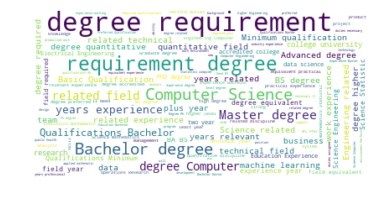

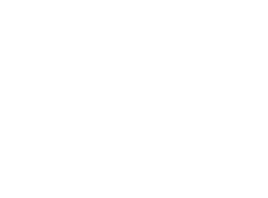

In [134]:
plt.imshow(sample, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

In [127]:
positionstring = ""
for i in newalldata['position']:
    i = str(i)
    positionstring += " " + i

In [129]:
positionstring = re.sub("[\d]+","",positionstring)

In [130]:
sample.generate(positionstring)

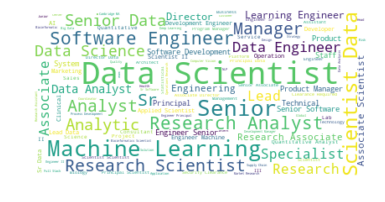

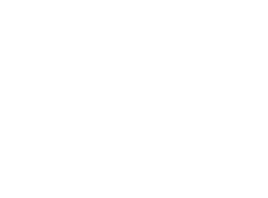

In [131]:
plt.imshow(sample, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()